### Install modules in terminal

In [98]:
%pip install pandas scikit-learn numpy hmmlearn matplotlib joblib

Note: you may need to restart the kernel to use updated packages.


### Import modules

In [99]:
import pandas as pd

import joblib
import numpy as np

import hmmlearn.hmm
from hmmlearn.hmm import MultinomialHMM, GaussianHMM

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import config

### HMM Model with 2024 data

In [100]:
training_df = pd.read_csv("../datasets/BTCUSDT_train_features.csv")

print(training_df)


                 timestamp      open      high       low     close  \
0      2018-01-01 17:00:00  13093.10  13248.60  13093.09  13138.11   
1      2018-01-01 18:00:00  13138.12  13321.23  13114.47  13189.98   
2      2018-01-01 19:00:00  13189.98  13350.00  13156.91  13345.47   
3      2018-01-01 20:00:00  13345.47  13544.24  13345.46  13469.01   
4      2018-01-01 21:00:00  13469.01  13772.59  13432.00  13565.00   
...                    ...       ...       ...       ...       ...   
26942  2021-01-29 11:00:00  36686.34  37307.28  36491.79  37108.69   
26943  2021-01-29 12:00:00  37106.18  37988.28  36622.22  37967.31   
26944  2021-01-29 13:00:00  37967.74  38570.13  37171.79  38458.99   
26945  2021-01-29 14:00:00  38499.99  38534.47  36570.00  37185.49   
26946  2021-01-29 15:00:00  37185.49  37619.92  36868.50  37178.27   

            volume        rsi         macd        ema_12        ema_26  \
0       380.269338  35.795321  -191.147212  13323.908819  13515.056031   
1       552

In [101]:
# # Load your data
# df = training_df

# # Convert to datetime
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Sort by time just in case
# df = df.sort_values('timestamp')

# # Drop NaN from the first row (due to shift)
# df = df.dropna()

# # Prepare observation sequence (log returns and normalized volume)
# df['volume_norm'] = (df['volume'] - df['volume'].mean()) / df['volume'].std()
# df['rsi_norm'] = (df['rsi'] - df['rsi'].mean()) / df['rsi'].std()
# df['macd_norm'] = (df['macd'] - df['macd'].mean()) / df['macd'].std()
# df['ema12_norm'] = (df['ema_12'] - df['ema_12'].mean()) / df['ema_12'].std()
# df['ema26_norm'] = (df['ema_26'] - df['ema_26'].mean()) / df['ema_26'].std()
# df['sma20_norm'] = (df['sma_20'] - df['sma_20'].mean()) / df['sma_20'].std()
# df['volatility_norm'] = (df['volatility'] - df['volatility'].mean()) / df['volatility'].std()

# df = df.dropna()

# observations = df[['log_return', 'volume_norm', 'rsi_norm', 'macd_norm', 'ema12_norm', 'ema26_norm', 'sma20_norm', 'volatility_norm']].values
# # observations = df[['log_return', 'volume_norm']].values

# # Fit a Gaussian HMM with N hidden states
# hmmodel = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000) 
# hmmodel.fit(observations)

# # Predict the hidden states
# hidden_states = hmmodel.predict(observations)

# # Add hidden states to dataframe
# df['state'] = hidden_states

# print(df[['timestamp', 'open', 'close', 'log_return', 'state']])


In [102]:
#Load your data
df = training_df

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by time just in case
df = df.sort_values('timestamp')

# Drop NaN from the first row (due to shift)
df = df.dropna()


# Initialize the StandardScaler
scaler = StandardScaler()

# Prepare observation sequence (log returns and normalized volume)
df['volume_norm'] = scaler.fit_transform(df[['volume']])  # Standardize volume
df['rsi_norm'] = scaler.fit_transform(df[['rsi']])  # Standardize RSI
df['macd_norm'] = scaler.fit_transform(df[['macd']])  # Standardize MACD
df['ema12_norm'] = scaler.fit_transform(df[['ema_12']])  # Standardize EMA12
df['ema26_norm'] = scaler.fit_transform(df[['ema_26']])  # Standardize EMA26
df['sma20_norm'] = scaler.fit_transform(df[['sma_20']])  # Standardize SMA20
df['volatility_norm'] = scaler.fit_transform(df[['volatility']])  # Standardize volatility

df = df.dropna()


observations = df[['log_return', 'volume_norm', 'rsi_norm', 'macd_norm', 'ema12_norm', 'ema26_norm', 'sma20_norm', 'volatility_norm']].values
# observations = df[['log_return', 'volume_norm']].values

# Fit a Gaussian HMM with N hidden states
hmmodel = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000, verbose=True)
hmmodel.fit(observations)

# Predict the hidden states
hidden_states = hmmodel.predict(observations)

# Add hidden states to dataframe
df['state'] = hidden_states

print(df[['timestamp', 'open', 'close', 'log_return', 'state']])

print("Converged:", hmmodel.monitor_.converged)
print("Final log likelihood:", hmmodel.monitor_.history[-1])
print(df['state'].value_counts(normalize=True))
print("Transition Matrix:\n", hmmodel.transmat_)




         1 -216928.15910947             +nan
         2 -100105.85759674 +116822.30151273
         3  -79248.05827552  +20857.79932121
         4  -63891.48092251  +15356.57735302
         5  -54558.35115913   +9333.12976337
         6  -48256.53497139   +6301.81618774
         7  -41232.43311323   +7024.10185816
         8  -36585.87491306   +4646.55820017
         9  -34846.58150556   +1739.29340751
        10  -34012.09714938    +834.48435618
        11  -33534.29420502    +477.80294436
        12  -33234.36653120    +299.92767382
        13  -33020.26425699    +214.10227421
        14  -32868.60768677    +151.65657021
        15  -32759.88180931    +108.72587746
        16  -32672.23635193     +87.64545738
        17  -32610.87906391     +61.35728802
        18  -32567.62503643     +43.25402748
        19  -32533.16572316     +34.45931327
        20  -32505.79015897     +27.37556419
        21  -32483.89021148     +21.89994748
        22  -32466.12875191     +17.76145958
        23

                timestamp      open     close  log_return  state
0     2018-01-01 17:00:00  13093.10  13138.11    0.003432      1
1     2018-01-01 18:00:00  13138.12  13189.98    0.003940      1
2     2018-01-01 19:00:00  13189.98  13345.47    0.011720      1
3     2018-01-01 20:00:00  13345.47  13469.01    0.009214      1
4     2018-01-01 21:00:00  13469.01  13565.00    0.007101      1
...                   ...       ...       ...         ...    ...
26942 2021-01-29 11:00:00  36686.34  37108.69    0.011150      1
26943 2021-01-29 12:00:00  37106.18  37967.31    0.022874      1
26944 2021-01-29 13:00:00  37967.74  38458.99    0.012867      1
26945 2021-01-29 14:00:00  38499.99  37185.49   -0.033674      1
26946 2021-01-29 15:00:00  37185.49  37178.27   -0.000194      1

[26947 rows x 5 columns]
Converged: True
Final log likelihood: -26767.864937920185
state
0    0.447248
2    0.360485
1    0.192266
Name: proportion, dtype: float64
Transition Matrix:
 [[9.74889300e-01 2.30366512e-02 2.0

        70  -26767.94435446      +0.04878214
        71  -26767.91667698      +0.02767748
        72  -26767.89819524      +0.01848174
        73  -26767.88440094      +0.01379431
        74  -26767.87356332      +0.01083762
        75  -26767.86493792      +0.00862540


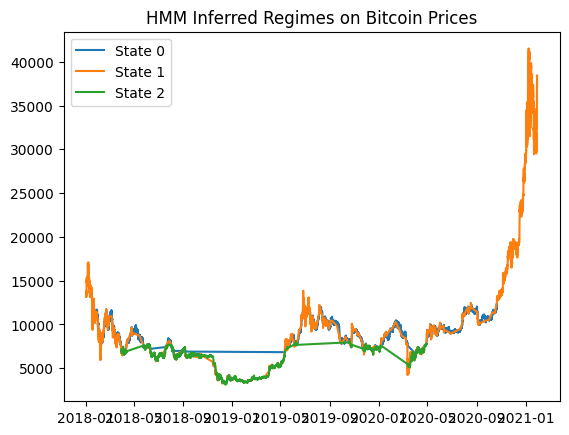

In [103]:
for i in range(hmmodel.n_components):
    state_series = df[df['state'] == i]
    plt.plot(state_series['timestamp'], state_series['close'], label=f'State {i}')

    #the state 0 represents a bear market (steady growth with low volatility) and state 1 represents a bull market (downward trend and high volatility)

plt.legend()
plt.title("HMM Inferred Regimes on Bitcoin Prices")
plt.show()

### Identify the meaning of the state number

In [ ]:
# Calculate average return, volatility, and volume per state
state_analysis = df.groupby('state').agg({
    'log_return': ['mean', 'std'],
    'volume_norm': 'mean',
    'rsi_norm': 'mean',
    'macd_norm': 'mean',
    'ema12_norm': 'mean',
    'ema26_norm': 'mean',
    'sma20_norm': 'mean',
    'volatility_norm': 'mean'
})

# Calculate the relative frequency (percentage) of each state
state_percentages = df['state'].value_counts(normalize=True) * 100

# Determine which state is most bullish (highest average return)
bullish_state = state_analysis['log_return']['mean'].idxmax()
print("\nState considered Bullish =", bullish_state)

# Determine which state is most bearish (lowest average return)
bearish_state = state_analysis['log_return']['mean'].idxmin()
print("State considered Bearish =", bearish_state)

# Determine the Neutral state (neither max nor min return)
neutral_state = list(set(df['state'].unique()) - {bullish_state, bearish_state})[0]
print("State considered Neutral =", neutral_state)

# #Update the state labels in config.py
# config.STATE_LABELS['bullish'] = int(bullish_state)
# config.STATE_LABELS['bearish'] = int(bearish_state)
# config.STATE_LABELS['neutral'] = int(neutral_state)

# # Print the state mapping and analysis
# print("\nPercentage of each state:")
# print(state_percentages)

# print("\n=== State Analysis === ")
# print(state_analysis)

# # Save the updated config to a file
# with open('config.py', 'w') as f:
#     f.write(f"STATE_LABELS = {config.STATE_LABELS}\n")


# # Add market_state labels based on analysis
# state_mapping = {
#     bullish_state: 'bullish',
#     bearish_state: 'bearish',
#     neutral_state: 'neutral'
# }
# df['market_state'] = df['state'].map(state_mapping)
# print(df[['timestamp', 'open', 'close', 'log_return', 'state', 'market_state']])
# Update the state labels in config.py
config.STATE_LABELS = {
    bullish_state: 'bullish',
    bearish_state: 'bearish',
    neutral_state: 'neutral'
}

# Print the state mapping and analysis
print("\nPercentage of each state:")
print(state_percentages)

print("\n=== State Analysis === ")
print(state_analysis)

# Save the updated config to a file (only write the correct STATE_LABELS)
with open('config.py', 'w') as f:
    f.write(f"STATE_LABELS = {config.STATE_LABELS}\n")

# Add market_state labels based on analysis (this step is separate and unrelated to config.py)
state_mapping = {
    bullish_state: 'bullish',
    bearish_state: 'bearish',
    neutral_state: 'neutral'
}
df['market_state'] = df['state'].map(state_mapping)
print(df[['timestamp', 'open', 'close', 'log_return', 'state', 'market_state']])



State considered Bullish = 0
State considered Bearish = 1
State considered Neutral = 2

Percentage of each state:
state
0    44.72483
2    36.04854
1    19.22663
Name: proportion, dtype: float64

=== State Analysis === 
      log_return           volume_norm  rsi_norm macd_norm ema12_norm  \
            mean       std        mean      mean      mean       mean   
state                                                                   
0       0.000091  0.005427   -0.187329  0.003739 -0.011025   0.038493   
1      -0.000075  0.017156    1.060281  0.054512  0.102209   1.145029   
2       0.000035  0.004225   -0.333089 -0.033713 -0.040834  -0.658463   

      ema26_norm sma20_norm volatility_norm  
            mean       mean            mean  
state                                        
0       0.038860   0.038795       -0.157429  
1       1.146412   1.145586        1.231432  
2      -0.659656  -0.659135       -0.461470  
                timestamp      open     close  log_return  state

In [117]:
# # Calculate average return, volatility, and volume per state
# state_analysis = df.groupby('state').agg({
#     'log_return': ['mean', 'std'],
#     'volume_norm': 'mean',
#     'rsi_norm': 'mean',
#     'macd_norm': 'mean',
#     'ema12_norm': 'mean',
#     'ema26_norm': 'mean',
#     'sma20_norm': 'mean',
#     'volatility_norm': 'mean'
# })

# # Calculate the relative frequency (percentage) of each state
# state_percentages = df['state'].value_counts(normalize=True) * 100

# print("Percentage of each state:")
# print(state_percentages)


# print("\n=== State Analysis (to identify the meaning of each state, the highest the log return, the market is bullish) === ")
# print(state_analysis)

# # Determine which state is most bullish (highest average return)
# bullish_state = state_analysis['log_return']['mean'].idxmax()
# print("\nState considered Bullish =", bullish_state)

# # Determine which state is most bearish (lowest average return)
# bearish_state = state_analysis['log_return']['mean'].idxmin()
# print("State considered Bearish =", bearish_state)

# # Determine the Neutral state (neither max nor min return)
# neutral_state = list(set(df['state'].unique()) - {bullish_state, bearish_state})[0]
# print("State considered Neutral =", neutral_state)

# # Add market_state labels based on analysis
# state_mapping = {
#     bullish_state: 'bullish',
#     bearish_state: 'bearish',
#     neutral_state: 'neutral'
# }
# df['market_state'] = df['state'].map(state_mapping)
# print(df[['timestamp', 'open', 'close', 'log_return', 'state', 'market_state']])


### Export the model

In [118]:
joblib.dump(hmmodel, '../models/hmm.pkl')


['../models/hmm.pkl']